In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("spotify.csv")
df.isna().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

In [25]:
df.tail()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
495,Brazil,Karol G,MAÑANA SERÁ BONITO,Jazz,2019,18.80,2947.97,12642.83,3.59,Premium,83.30,18.58
496,Canada,Dua Lipa,Future Nostalgia,Classical,2023,89.68,4418.61,11843.46,3.15,Free,143.96,5.82
497,Germany,Karol G,MAÑANA SERÁ BONITO,Rock,2019,36.93,2642.90,8637.46,4.08,Free,76.36,15.84
498,Canada,SZA,SOS,Indie,2022,87.26,4320.23,12201.40,2.79,Free,84.50,13.07
499,Sweden,BTS,Proof,Reggaeton,2023,89.96,4804.15,12044.32,4.03,Free,92.27,34.36


# Plot
- Biểu đồ đường cong

<Axes: >

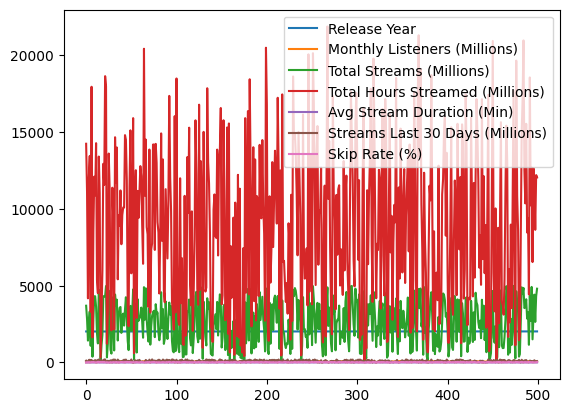

In [26]:
# Vẽ biểu đồ đường cho Monthly Listeners (Millions)
df.plot()

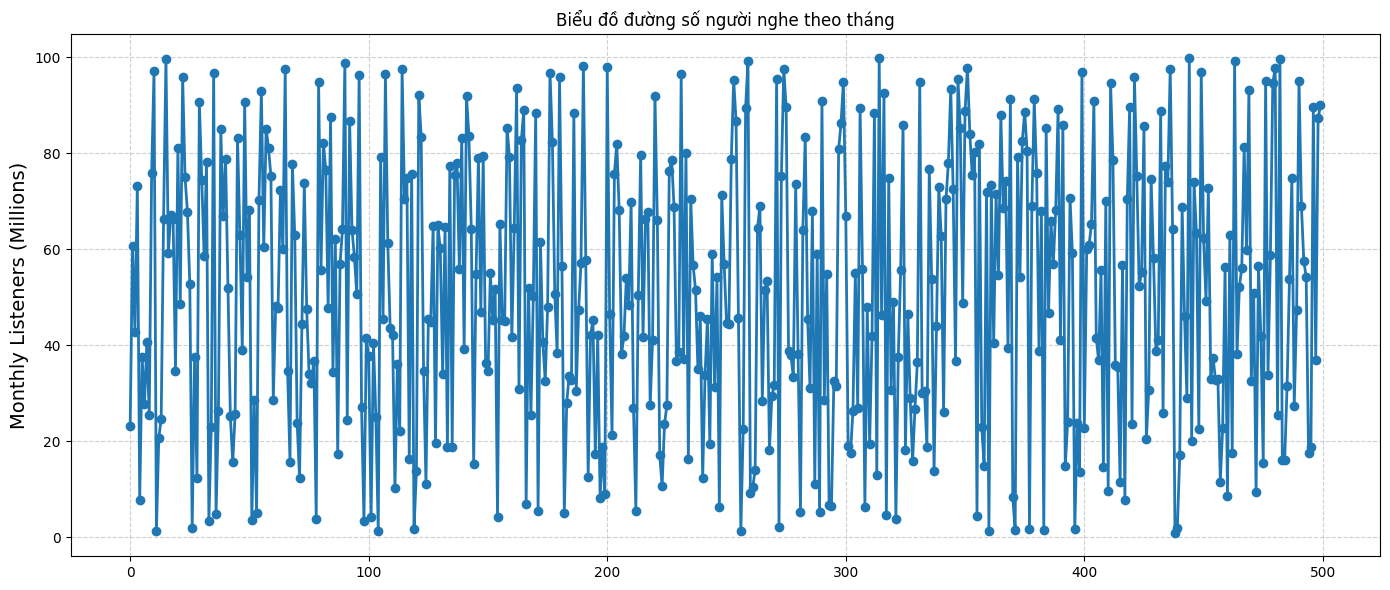

In [27]:
# Vẽ biểu đồ đường cho Monthly Listeners (Millions)
plt.figure(figsize=(14,6))
plt.plot(df["Monthly Listeners (Millions)"], marker="o", linestyle="-", linewidth=2)
plt.ylabel("Monthly Listeners (Millions)", fontsize=14)
plt.title("Biểu đồ đường số người nghe theo tháng")

plt.grid(True, linestyle="--", alpha=0.6)

# Hiển thị
plt.tight_layout()
plt.show()

# Bar
- Biểu đồ cột

In [28]:
# gồm nhóm data
artist_streams = df.groupby("Artist")["Total Streams (Millions)"].sum().nlargest(10)
artist_streams

Artist
BTS               124299.47
Dua Lipa          111305.99
Bad Bunny         106216.16
BLACKPINK         102238.89
Doja Cat           90098.83
Ed Sheeran         87859.35
Karol G            86737.71
Olivia Rodrigo     84378.54
Billie Eilish      82174.91
Drake              80948.91
Name: Total Streams (Millions), dtype: float64

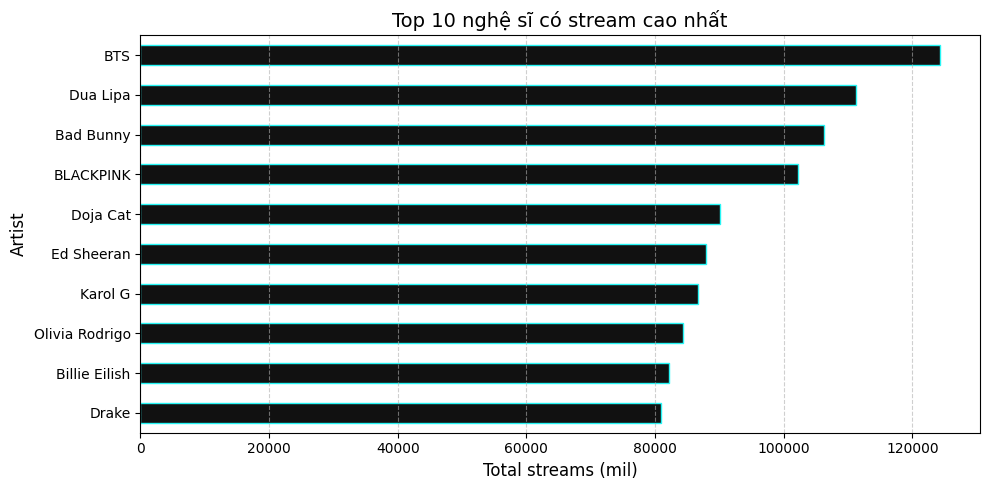

In [29]:
# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10,5))
artist_streams.plot(kind="barh", color="#111", edgecolor="#27F5F5")

plt.title("Top 10 nghệ sĩ có stream cao nhất", fontsize=14)
plt.xlabel("Total streams (mil)", fontsize=12)
plt.ylabel("Artist", fontsize=12)
# Đảo trúc để nghệ sĩ cao nhất nằm trên
plt.gca().invert_yaxis()

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

In [33]:
# add df từ billionaires
df_bili = pd.read_csv("../B4/billionaires.csv")
df_bili.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [34]:
# Xử lý null của cột tuổi -> tuổi TB
df_bili["age"] = df_bili["age"].fillna(df_bili["age"].mean()).round()
df_bili["age"]

0       74.0
1       51.0
2       59.0
3       78.0
4       92.0
        ... 
2635    51.0
2636    80.0
2637    60.0
2638    71.0
2639    66.0
Name: age, Length: 2640, dtype: float64

In [35]:
# Đổi kiểu int cho age
df_bili["age"] = df_bili["age"].astype(int)
df_bili["age"]

0       74
1       51
2       59
3       78
4       92
        ..
2635    51
2636    80
2637    60
2638    71
2639    66
Name: age, Length: 2640, dtype: int64

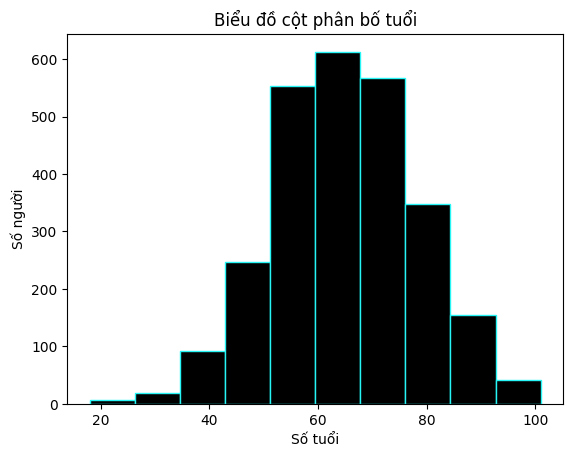

In [36]:
# Vẽ biểu đồ tuổi
plt.hist(x = df_bili["age"], color="#000", edgecolor="#27F5F5")
plt.title("Biểu đồ cột phân bố tuổi")
plt.ylabel("Số người")
plt.xlabel("Số tuổi")
plt.show()